### **Proyecto Evaluaciones de estudiantes**

Los datos de este proyecto se obtuvieron de la página https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

El dataset contiene datos de exámenes presentados por estudiantes en matemáticas, lectura y escritura

Objetivos


*   Analizar cuáles de las variables categóricas del dataset son más relevantes para la aprobación de las pruebas en matemáticas, lectura y escritura
*   Determinar cuál es el modelo que predice mejor los resultados de las pruebas
*   Explorar los hiperparámetros de los modelos estudiados






Importamos las librerías correspondientes

In [1]:
import sklearn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

Cargamos el dataset "StudentsPerformance" en formato csv:

In [2]:
exams = pd.read_csv('StudentsPerformance.csv')
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Observamos que el dataset se encuentra bastante limpio. Revisemos los datos:

In [3]:
exams.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
for i in exams.columns:
  print(exams[i].unique())
  

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

| Variable | Definición	| Valores | 
| --- | --- | --- |
| gender | 	Género del estudiante  |female, male|
| race/ethnicity | 	Grupo racial  |group A a group E |
| parental level of education | Nivel de educación de los padres  ||
| lunch 	| Tipo de almuerzo |standard, free-reduced |
| test preparation course 	|Tiempo de preparación 	| none, completed|
| math score |	Puntaje en matemáticas 	||
| reading score |	Puntaje en lectura 	| |
| writing score |	Puntaje en escritura 	| |

In [5]:
numeric = ['math score', 'reading score', 'writing score']
categoric = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [6]:
exams.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## **Visualización de los datos**

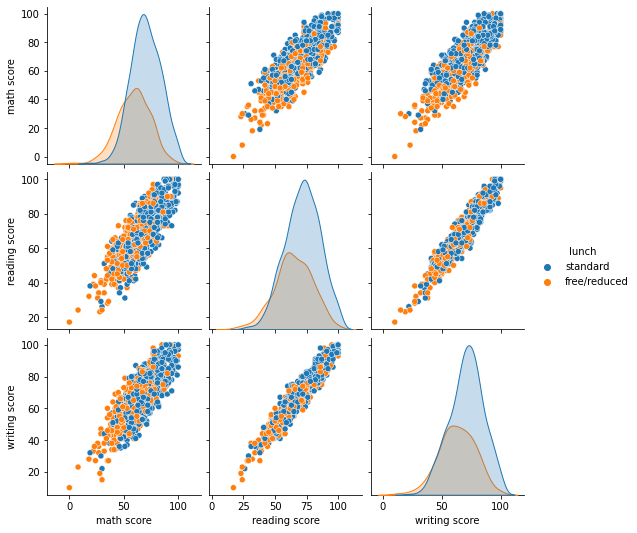

In [7]:
sns.pairplot(data = exams, hue = categoric[3])

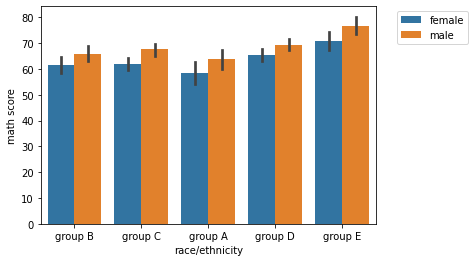

In [8]:
plot1 = sns.barplot(data = exams, x = categoric[1], y =numeric[0], hue=categoric[0] )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

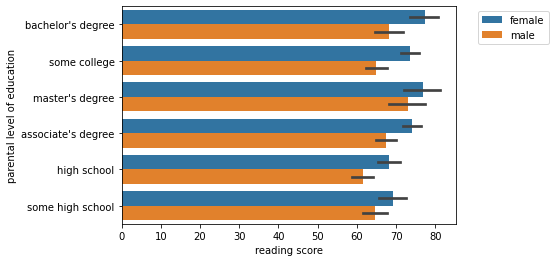

In [9]:
plot2 = sns.barplot(data = exams, x = numeric[1], y =categoric[2], hue=categoric[0], orient = 'h' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

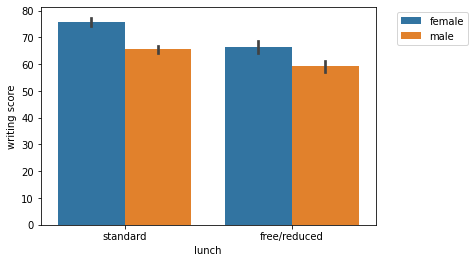

In [10]:
plot3 = sns.barplot(data = exams, x = categoric[3], y=numeric[2], hue=categoric[0])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Observemos los outliers usando gráficas de boxplot:

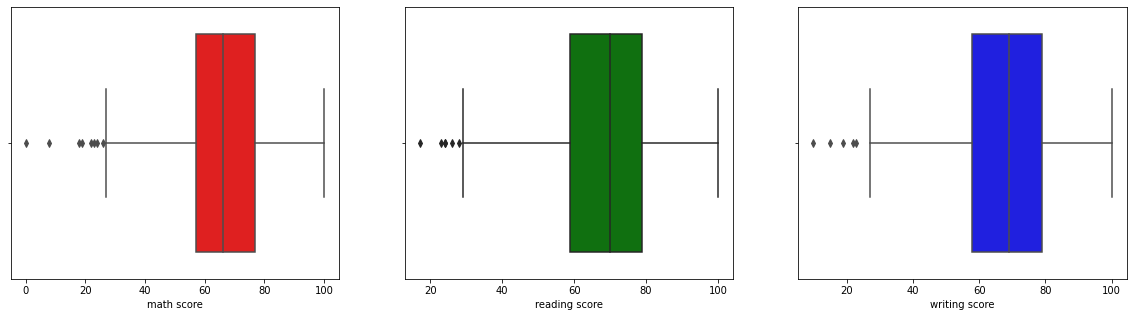

In [12]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.boxplot(x=exams[numeric[0]], color='r', ax=ax[0])
sns.boxplot(x=exams[numeric[1]], color='g', ax=ax[1])
sns.boxplot(x=exams[numeric[2]], color='b', ax=ax[2])

Convertimos los datos en formato X, y, las variables objetivo serán las variables numéricas pero transformadas a una variable binaria con valores de cero si no aprobó (puntaje del examen menor a 60) y uno si aprobó

In [13]:
X = exams.drop(['math score'], axis=1)
y_math = exams['math score'].apply(lambda x: 1 if x >= 60 else 0)
y_read = exams['reading score'].apply(lambda x: 1 if x >= 60 else 0)
y_write = exams['writing score'].apply(lambda x: 1 if x >= 60 else 0)

In [14]:
X_categoric = X[categoric]

Usamos One hot Encoder para codificar las variables categóricas:

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
X_categoric_onehot = enc.fit_transform(X_categoric)
X_categoric_onehot_pd = pd.DataFrame(X_categoric_onehot)

 

Renombramos las columnas y borramos las columnas redundantes:

In [16]:
X_categoric_onehot_final = X_categoric_onehot_pd.rename(columns = {0:'Female', 1:'Male', 2: 'Group A', 3: 'Group B', 4: 'Group C', 5: 'Group D', 6: 'Group E', 7: 'Associate', 
                                                                   8: 'Bachelor', 9: 'High School', 10: 'Master', 11:'Some college', 12:'Some high school', 13: 'Reduced lunch', 14: 'Standard lunch',
                                                                   15: 'Preparation', 16: 'No preparation' })

X_categoric_onehot_final = X_categoric_onehot_final.drop(columns = ['Male','Reduced lunch','No preparation'])


# **Partición de entrenamiento y prueba**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_categoric_onehot_final, y_math, test_size=0.3, random_state=42)

A continuación estudiamos diferentes modelos y realizamos un GridSearch, explorando hiperparámetros para cada uno. Posteriormente, utilizando los resultados de GridSearch  entrenamos el modelo y calculamos su exactitud:

# *Regresión Logística*

In [19]:
params_linear = {    
      'C' : [0.01, 0.1, 1 ], 
      'max_iter' : [100, 1000, 2000]           
 }
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
gsearch = GridSearchCV(estimator = LogisticRegression(), param_grid = params_linear, cv=5)
gsearch.fit(X_train, y_train)
print(f"Mejores hiperparámetros:\t{gsearch.best_params_}")
print(f"Mejor score:\t{gsearch.best_score_:.4f}")

Mejores hiperparámetros:	{'C': 1, 'max_iter': 100}
Mejor score:	0.7186


In [20]:
from sklearn.metrics import accuracy_score
lineal = LogisticRegression(C = 1,  max_iter=100)
lineal.fit(X_train, y_train)
y_pred = lineal.predict(X_test)
print(f"Error en entrenamiento:\t{1-lineal.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-lineal.score(X_test, y_test):.4f}")
lineal_acc = accuracy_score(y_test, y_pred)
print(f"Exactitud:\t{lineal_acc:.4f}")


Error en entrenamiento:	0.2729
Error en prueba:	0.3333
Exactitud:	0.6667


Importancia de los coeficientes de la regresión lineal:

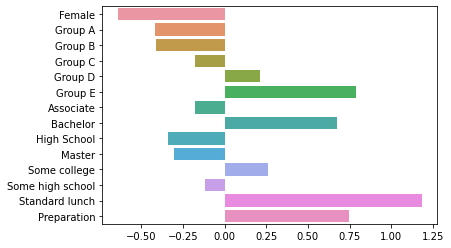

In [21]:
plot4 = sns.barplot(y = X_categoric_onehot_final.columns, x = lineal.coef_.reshape((-1,)), orient = 'h')

# *Naive Bayes*

In [22]:
params_bayes = {    
      'alpha' : [0.01, 0.1, 1, 10 ]         
 }
from sklearn.naive_bayes import BernoulliNB
gsearch = GridSearchCV(estimator = BernoulliNB(), param_grid = params_bayes, cv=5)
gsearch.fit(X_train, y_train)
print(f"Mejores hiperparámetros:\t{gsearch.best_params_}")
print(f"Mejor score:\t{gsearch.best_score_:.4f}")

Mejores hiperparámetros:	{'alpha': 10}
Mejor score:	0.7100


In [23]:
bayes = BernoulliNB(alpha = 10)
bayes.fit(X_train, y_train)
bayes_predictions = bayes.predict(X_test)
bayes_acc = accuracy_score(y_test, bayes_predictions)
print(f"Error en entrenamiento:\t{1-bayes.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-bayes.score(X_test, y_test):.4f}")
print(f"Exactitud:\t{bayes_acc:.4f}")



Error en entrenamiento:	0.2700
Error en prueba:	0.3200
Exactitud:	0.6800


# *Árboles de Decisión*

In [24]:
params_trees = {    
      'max_depth' : [2, 3, 4, 5 ]         
 }
from sklearn.tree import DecisionTreeClassifier
gsearch = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params_trees, cv=5)
gsearch.fit(X_train, y_train)
print(f"Mejores hiperparámetros:\t{gsearch.best_params_}")
print(f"Best score:\t{gsearch.best_score_:.4f}")

Mejores hiperparámetros:	{'max_depth': 3}
Best score:	0.7129


In [25]:
trees = DecisionTreeClassifier(random_state=42, max_depth = 3)
exams_trees= trees.fit(X_train, y_train)
tree_predictions = trees.predict(X_test)
print(f"Error en entrenamiento:\t{1-trees.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-trees.score(X_test, y_test):.4f}")
trees_acc = accuracy_score(y_test, tree_predictions)
print(f"Exactitud:\t{trees_acc:.4f}")

Error en entrenamiento:	0.2757
Error en prueba:	0.3433
Exactitud:	0.6567


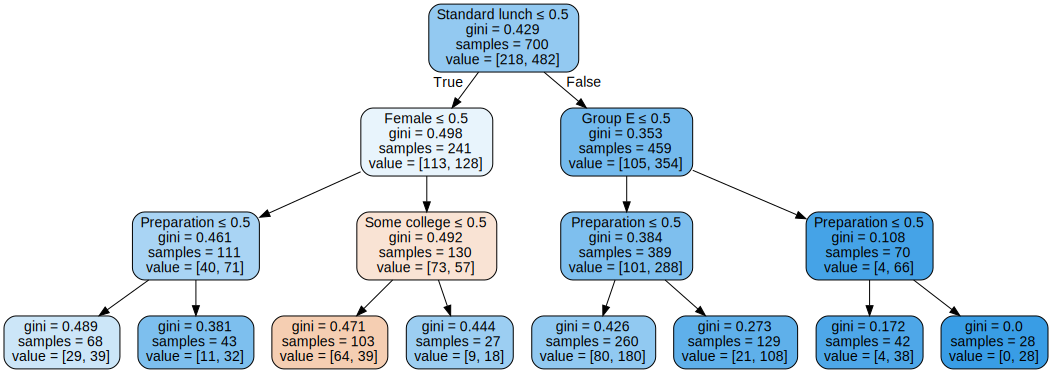

In [26]:
from IPython.display import SVG
from sklearn.tree import export_graphviz
import graphviz
graphviz_data = export_graphviz(exams_trees, out_file=None, feature_names = X_categoric_onehot_final.columns, 
                                filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(graphviz_data)

SVG(graph.pipe(format='svg'))

*Importancia de las variables*

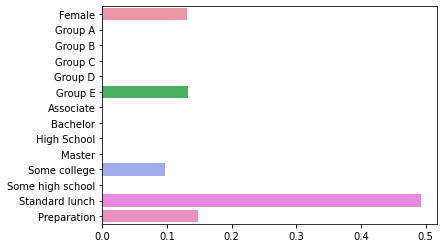

In [27]:
sns.barplot(y = X_categoric_onehot_final.columns, x = exams_trees.feature_importances_, orient = 'h' )

*Random Forests*

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0)
exams_forest = forest.fit(X_train, y_train)
forest_predictions = trees.predict(X_test)
print(f"Error en entrenamiento:\t{1-forest.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-forest.score(X_test, y_test):.4f}")
forest_acc = accuracy_score(y_test, forest_predictions)
print(f"Exactitud:\t{forest_acc:.4f}")


Error en entrenamiento:	0.2200
Error en prueba:	0.3733
Exactitud:	0.6567


*Importancia de las variables*

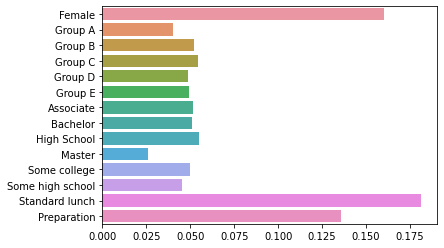

In [29]:
sns.barplot(y = X_categoric_onehot_final.columns, x = exams_forest.feature_importances_, orient = 'h' )

*Gradient boosted regression trees*

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
ensemble = GradientBoostingClassifier(random_state=0)
exams_ensemble = ensemble.fit(X_train, y_train)
ensemble_predictions = ensemble.predict(X_test)
print(f"Error en entrenamiento:\t{1-forest.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-forest.score(X_test, y_test):.4f}")
ensemble_acc = accuracy_score(y_test, ensemble_predictions)
print(f"Exactitud:\t{forest_acc:.4f}")


Error en entrenamiento:	0.2200
Error en prueba:	0.3733
Exactitud:	0.6567


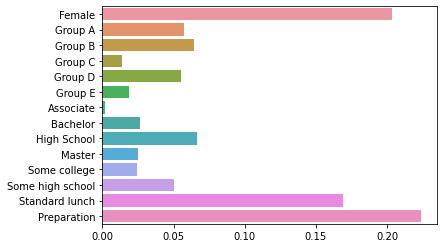

In [ ]:
sns.barplot(y = X_categoric_onehot_final.columns, x = exams_ensemble.feature_importances_, orient = 'h' )

# *Redes Neuronales*

In [31]:
params_redes = {    
      'hidden_layer_sizes' : [(10,), (50,), (100,) ], 
      'activation' : ['logistic', 'tanh', 'relu']           
 }

In [37]:
from sklearn.neural_network import MLPClassifier

gsearch = GridSearchCV(estimator = MLPClassifier(solver = 'adam',          
                                                random_state=42,
                                                max_iter= 3000,
                                                n_iter_no_change=50, 
                                                validation_fraction=0.2), 
                                                param_grid = params_redes, cv = 5)
gsearch.fit(X_train, y_train)
print(f"Mejores hiperparámetros:\t{gsearch.best_params_}")
print(f"Mejor score:\t{gsearch.best_score_:.4f}")

Mejores hiperparámetros:	{'activation': 'tanh', 'hidden_layer_sizes': (10,)}
Mejor score:	0.7214


In [33]:
mlpc = MLPClassifier(activation = 'tanh', random_state=42, hidden_layer_sizes=[10,], max_iter=1000, solver = 'adam')
mlpc.fit(X_train, y_train)
mlpc_predictions = mlpc.predict(X_test)
print(f"Error en entrenamiento:\t{1-mlpc.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-mlpc.score(X_test, y_test):.4f}")
mlpc_acc = accuracy_score(y_test, mlpc_predictions)
print(f"Exactitud:\t{mlpc_acc:.4f}")


Error en entrenamiento:	0.2671
Error en prueba:	0.3433
Exactitud:	0.6567


# *Máquinas de vectores de soporte*

In [34]:
params_SVC = {    
      'C' : [0.01, 0.1, 1, 10 ], 
      'max_iter' : [3000, 5000, 10000],
      'fit_intercept' : [True, False]           
 }

In [35]:
from sklearn.svm import LinearSVC
gsearch = GridSearchCV(estimator = LinearSVC(), param_grid = params_SVC)
gsearch.fit(X_train, y_train)
print(f"Mejores hiperparámetros:\t{gsearch.best_params_}")
print(f"Mejor score:\t{gsearch.best_score_:.4f}")

Mejores hiperparámetros:	{'C': 0.1, 'fit_intercept': True, 'max_iter': 3000}
Mejor score:	0.7157


In [36]:
exams_svm = LinearSVC(C = 0.1, max_iter = 3000, fit_intercept = True)
exams_svm.fit(X_train, y_train)
svm_predictions= exams_svm.predict(X_test)
print(f"Error en entrenamiento:\t{1-exams_svm.score(X_train, y_train):.4f}")
print(f"Error en prueba:\t{1-exams_svm.score(X_test, y_test):.4f}")
svm_acc = accuracy_score(y_test, svm_predictions)
print(f"Exactitud:\t{svm_acc:.4f}")

Error en entrenamiento:	0.2686
Error en prueba:	0.3367
Exactitud:	0.6633


# *Conclusiones*


*   Las variables más relevantes son la preparación para el examen, el tipo de almuerzo y el género
*   Los modelo que presentan una mayor exactitud son Naive Bayes > Regresión Logística > Máquinas de Vectores de Soporte Lineal SVC, sin embargo, los valores son similares en todos los modelos considerados

